In [1]:
!pip install gspread
!pip install oauth2client

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [16]:
import pandas, gspread, random, numpy

In [19]:
#https://medium.com/analytics-vidhya/how-to-read-and-write-data-to-google-spreadsheet-using-python-ebf54d51a72c
from oauth2client.service_account import ServiceAccountCredentials

scope = ['https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name('ai-pm-project-46ef9dbd112c.json', scope)
client = gspread.authorize(credentials)

# Import Google Sheet

In [29]:
# Open a worksheet
#sheet = client.open("AI PM Data Structure").sheet1
sheet = client.open("AI PM Data Test").sheet1

# Get all records
records = sheet.get_all_records()
# Print the records
print(records)

[{'simulation_start_time': '', 'success_or_failure': '', 'week': 0, 'scope_remaining_at_week_start_index': '', 'scope_remaining_at_week_end_index': 42, 'schedule_remaining_at_week_start_week': '', 'schedule_remaining_at_week_end_week': 21, 'budget_remaining_at_week_start_dollar': '$81,900', 'budget_remaining_at_week_end_dollar': '$81,900', 'scope_shock_during_the_week_index': 0, 'standard_weekly_labour_rate_dollar': 1500, 'resource_lv1_productivity_at_week_start_index': 0.5, 'resource_lv2_productivity_at_week_start_index': 0.9, 'resource_lv3_productivity_at_week_start_index': 1.15, 'resource_lv1_available_during_the_week_count': 0, 'resource_lv2_available_during_the_week_count': 0, 'resource_lv3_available_during_the_week_count': 0, 'resource_lv1_weekly_rate_dollar': 900, 'resource_lv2_weekly_rate_dollar': 1500, 'resource_lv3_weekly_rate_dollar': 1875, 'resource_lv1_used_during_the_week_count': '', 'resource_lv2_used_during_the_week_count': '', 'resource_lv3_used_during_the_week_count':

In [30]:
simulation_df = pandas.DataFrame(records)

simulation_df.loc[:,:].dtypes

simulation_start_time                                       object
success_or_failure                                          object
week                                                         int64
scope_remaining_at_week_start_index                         object
scope_remaining_at_week_end_index                           object
schedule_remaining_at_week_start_week                       object
schedule_remaining_at_week_end_week                         object
budget_remaining_at_week_start_dollar                       object
budget_remaining_at_week_end_dollar                         object
scope_shock_during_the_week_index                            int64
standard_weekly_labour_rate_dollar                           int64
resource_lv1_productivity_at_week_start_index               object
resource_lv2_productivity_at_week_start_index               object
resource_lv3_productivity_at_week_start_index               object
resource_lv1_available_during_the_week_count                 i

# Cleanse NULL in scope shock column

In [31]:
simulation_df['scope_shock_during_the_week_index']=pandas.to_numeric(simulation_df['scope_shock_during_the_week_index'],errors='coerce').astype('float')
simulation_df['scope_shock_during_the_week_index'].fillna(0,inplace = True)

simulation_df['scope_shock_during_the_week_index']

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
Name: scope_shock_during_the_week_index, dtype: float64

# Cleanse dollar columns as they are originally stored as object/str when transferring from Google Sheet

In [32]:
column_with_dollar_list = []
#identify column names with $
for column in simulation_df.columns:
    if 'dollar' in column:
        column_with_dollar_list.append(column)
#replace column values in dataframe
for column in column_with_dollar_list:
    simulation_df[column] = simulation_df[column].astype('str').str.replace('$','').str.replace(',','')
    #empty str '' cannot directly apply astype float. need code below
    simulation_df[column] = pandas.to_numeric(simulation_df[column],errors='coerce').astype('float')
simulation_df[column_with_dollar_list]

,budget_remaining_at_week_start_dollar,budget_remaining_at_week_end_dollar,standard_weekly_labour_rate_dollar,resource_lv1_weekly_rate_dollar,resource_lv2_weekly_rate_dollar,resource_lv3_weekly_rate_dollar,resouce_lv1_actual_cost_during_the_week_dollar,resouce_lv2_actual_cost_during_the_week_dollar,resouce_lv3_actual_cost_during_the_week_dollar
0,81900.0,81900.0,1500.0,900.0,1500.0,1875.0,0.0,0.0,0.0
1,NaN,NaN,1500.0,900.0,1500.0,1875.0,NaN,NaN,NaN
2,NaN,NaN,1500.0,900.0,1500.0,1875.0,NaN,NaN,NaN
3,NaN,NaN,1500.0,900.0,1500.0,1875.0,NaN,NaN,NaN
4,NaN,NaN,1500.0,900.0,1500.0,1875.0,NaN,NaN,NaN
5,NaN,NaN,1500.0,900.0,1500.0,1875.0,NaN,NaN,NaN
6,NaN,NaN,1500.0,900.0,1500.0,1875.0,NaN,NaN,NaN
7,NaN,NaN,1500.0,900.0,1500.0,1875.0,NaN,NaN,NaN
8,NaN,NaN,1500.0,900.0,1500.0,1875.0,NaN,NaN,NaN
9,NaN,NaN,1500.0,900.0,1500.0,1875.0,NaN,NaN,NaN


# Set learning curve

In [33]:
#define learning curve function


import math

def learning_curve_sigmoid(t,min_productivity,max_productivity,growth_rate,time_midpoint):
    new_productivity = min_productivity + ((max_productivity - min_productivity) / (1+math.exp(-growth_rate*(t-time_midpoint))))
    return new_productivity

def learning_curve_sigmoid_inverse(current_productivity,min_productivity,max_productivity,growth_rate,time_midpoint):
    intermediate_step = (max_productivity - min_productivity) / (current_productivity - min_productivity)
    t_value = math.log(intermediate_step - 1)/(-growth_rate) + time_midpoint
    return  t_value

def learning_curve_iterative(current_productivity,min_productivity,max_productivity,growth_rate,time_midpoint):
    if min_productivity==0 or max_productivity==0:
        raise ValueError('No 0 productivity')
    #midpoint is the inflection point where growth starts to slow
    current_time_in_learning_curve = learning_curve_sigmoid_inverse(current_productivity,min_productivity,max_productivity,growth_rate,time_midpoint)
    next_week_time = current_time_in_learning_curve + 1
    next_week_productivity = learning_curve_sigmoid(next_week_time,min_productivity,max_productivity,growth_rate,time_midpoint)
    return next_week_productivity

#learning_curve_sigmoid(0,0.5,1,0.3,4)
learning_curve_sigmoid_inverse(0.6157376082504912,0.5,1,0.3,4)
#learning_curve_iterative(0.6157376082504912,0.5,1,0.3,4)

0.0

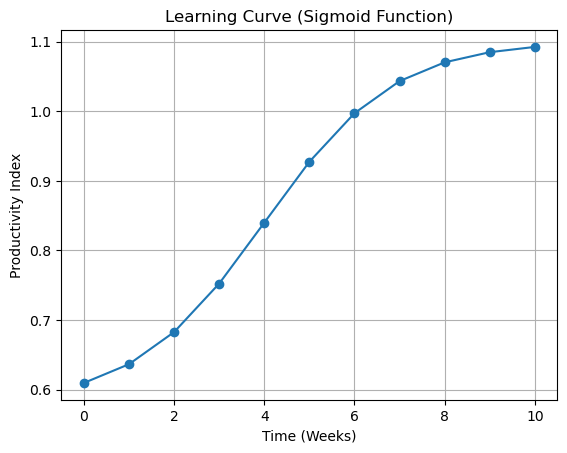

In [26]:
import math
import matplotlib.pyplot

# Parameters
min_productivity = 0.58
max_productivity = 1.1
growth_rate = 0.7
time_midpoint = 4

# Generate time values
time_values = range(0, 11)  # from week 0 to week 10

# Compute productivity values
productivity_values = [learning_curve_sigmoid(t, min_productivity, max_productivity, growth_rate, time_midpoint) for t in time_values]

# Plot the function
matplotlib.pyplot.plot(time_values, productivity_values, marker='o')
matplotlib.pyplot.title('Learning Curve (Sigmoid Function)')
matplotlib.pyplot.xlabel('Time (Weeks)')
matplotlib.pyplot.ylabel('Productivity Index')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()


# Set resource availability probability distribution

In [27]:
def get_resource_availability(min_available, max_available, probability_of_full_availability):
    """
    Calculate the number of resources available during the week based on:
    - Minimum and maximum resource availability
    - Probability of full availability
    
    Args:
    - min_available (int): Minimum number of resources available (e.g., 0)
    - max_available (int): Maximum number of resources available (e.g., 5)
    - probability_of_full_availability (float): Probability (0–1) of having full resources
    
    Returns:
    - int: Number of resources available during the week
    """
    if not (0 <= probability_of_full_availability <= 1):
        raise ValueError("Probability of full availability must be between 0 and 1.")
    
    # Define the possible resource levels (excluding the full availability level)
    partial_availability = list(range(min_available, max_available))
    
    # Full availability level
    full_availability = max_available
    
    # Weighted probabilities
    probabilities = [probability_of_full_availability] + [
        (1 - probability_of_full_availability) / len(partial_availability)
    ] * len(partial_availability)
    
    # Combine resource levels
    resource_levels = [full_availability] + partial_availability
    
    # Choose based on weighted probabilities
    return random.choices(resource_levels, probabilities)[0]

print(get_resource_availability(0, 5, 0.6))

3


# Simulation set up

In [27]:
import random, numpy
from datetime import datetime



#variable for storing simulation result
result_df = simulation_df.loc[0:0,:]

number_of_simulations = 2000

#loop multiple simulations
for simulation in range(0,number_of_simulations,1):
    #initialization based on row 0 or week 0
    scope_remaining = int(simulation_df.loc[0,'scope_remaining_at_week_end_index'])
    schedule_initial = int(simulation_df.loc[0,'schedule_remaining_at_week_end_week'])
    schedule_remaining = schedule_initial
    budget_remaining = int(simulation_df.loc[0,'budget_remaining_at_week_end_dollar'])
    scope_shock_during_the_week_index = 0
    standard_weekly_labour_rate_dollar = float(simulation_df.loc[0,'standard_weekly_labour_rate_dollar'])
    resource_lv1_productivity_at_week_start_index = float(simulation_df.loc[0,'resource_lv1_productivity_at_week_start_index'])
    resource_lv2_productivity_at_week_start_index = float(simulation_df.loc[0,'resource_lv2_productivity_at_week_start_index'])
    resource_lv3_productivity_at_week_start_index = float(simulation_df.loc[0,'resource_lv3_productivity_at_week_start_index'])
    resource_lv1_productivity_at_week_end_index = resource_lv1_productivity_at_week_start_index
    resource_lv2_productivity_at_week_end_index = resource_lv2_productivity_at_week_start_index
    resource_lv3_productivity_at_week_end_index = resource_lv3_productivity_at_week_start_index
    resource_lv1_available_during_the_week_count = float(simulation_df.loc[0,'resource_lv1_available_during_the_week_count'])
    resource_lv2_available_during_the_week_count = float(simulation_df.loc[0,'resource_lv2_available_during_the_week_count'])
    resource_lv3_available_during_the_week_count = float(simulation_df.loc[0,'resource_lv3_available_during_the_week_count'])
    resource_lv1_weekly_rate_dollar = float(simulation_df.loc[0,'resource_lv1_weekly_rate_dollar'])
    resource_lv2_weekly_rate_dollar = float(simulation_df.loc[0,'resource_lv2_weekly_rate_dollar'])
    resource_lv3_weekly_rate_dollar = float(simulation_df.loc[0,'resource_lv3_weekly_rate_dollar'])
    #learning curve initialization
    resource_lv1_productivity_min = resource_lv1_productivity_at_week_start_index *0.99 #cannot start at min. other wise inverse function wouldnt work
    resource_lv2_productivity_min = resource_lv2_productivity_at_week_start_index *0.99 #cannot start at min. other wise inverse function wouldnt work
    resource_lv3_productivity_min = resource_lv3_productivity_at_week_start_index *0.99 #cannot start at min. other wise inverse function wouldnt work
    resource_lv1_productivity_max = 1.1
    resource_lv2_productivity_max = 1.12
    resource_lv3_productivity_max = 1.2
    resource_lv1_productivity_growth = 0.6
    resource_lv2_productivity_growth = 0.6
    resource_lv3_productivity_growth = 0.6
    resource_lv1_productivity_time_midpoint = 4
    resource_lv2_productivity_time_midpoint = 4
    resource_lv3_productivity_time_midpoint = 4

    result_df_last_row_number = result_df.shape[0]
    simulation_start_time = datetime.now()
    success_or_failure = '' 
    
    #each simulation starts from week 1
    for week_num in range(1,schedule_initial+1,1):
        #week starting condition based on previous week ending condition
        schedule_remaining_at_week_start_week = schedule_remaining
        scope_remaining_at_week_start_index = scope_remaining
        budget_remaining_at_week_start_dollar = budget_remaining
        resource_lv1_productivity_at_week_start_index = resource_lv1_productivity_at_week_end_index
        resource_lv2_productivity_at_week_start_index = resource_lv2_productivity_at_week_end_index
        resource_lv3_productivity_at_week_start_index = resource_lv3_productivity_at_week_end_index
        
        
        #starting parameters for this week. keep constant for now unless otherwise stated
        standard_weekly_labour_rate_dollar
        resource_lv1_weekly_rate_dollar
        resource_lv2_weekly_rate_dollar
        resource_lv3_weekly_rate_dollar
        
        #randomized variables
        scope_shock_during_the_week_index = numpy.random.poisson(0.1) ##random shock following poisson with lambda avg
        #
        resource_lv1_available_during_the_week_count = random.randint(0,4)
        resource_lv2_available_during_the_week_count = random.randint(0,4)
        resource_lv3_available_during_the_week_count = random.randint(0,4)
        
        #update schedule    
        schedule_remaining_at_week_end_week = schedule_remaining - 1
        schedule_remaining = schedule_remaining_at_week_end_week
        
        #make decisions
        ###############################################################################################
        resource_lv1_used_during_the_week_count = random.randint(0,resource_lv1_available_during_the_week_count)
        resource_lv2_used_during_the_week_count = random.randint(0,resource_lv2_available_during_the_week_count)
        resource_lv3_used_during_the_week_count = random.randint(0,resource_lv3_available_during_the_week_count)  
        
       
        
        #update scope remaining
        resource_lv1_actual_accomplishment_during_the_week_index = resource_lv1_productivity_at_week_start_index * resource_lv1_used_during_the_week_count
        resource_lv2_actual_accomplishment_during_the_week_index = resource_lv1_productivity_at_week_start_index * resource_lv2_used_during_the_week_count
        resource_lv3_actual_accomplishment_during_the_week_index = resource_lv1_productivity_at_week_start_index * resource_lv3_used_during_the_week_count
        scope_remaining_at_week_end_index = (
            scope_remaining_at_week_start_index + scope_shock_during_the_week_index 
            - resource_lv1_actual_accomplishment_during_the_week_index 
            - resource_lv2_actual_accomplishment_during_the_week_index 
            - resource_lv3_actual_accomplishment_during_the_week_index)
        scope_remaining = scope_remaining_at_week_end_index
        #update budget remaining
        resouce_lv1_actual_cost_during_the_week_dollar = resource_lv1_weekly_rate_dollar * resource_lv1_used_during_the_week_count
        resouce_lv2_actual_cost_during_the_week_dollar = resource_lv2_weekly_rate_dollar * resource_lv2_used_during_the_week_count
        resouce_lv3_actual_cost_during_the_week_dollar = resource_lv3_weekly_rate_dollar * resource_lv3_used_during_the_week_count
        budget_remaining_at_week_end_dollar = (
            budget_remaining_at_week_start_dollar
            - resouce_lv1_actual_cost_during_the_week_dollar
            - resouce_lv2_actual_cost_during_the_week_dollar
            - resouce_lv3_actual_cost_during_the_week_dollar)
        budget_remaining = budget_remaining_at_week_end_dollar

        #update productivity learning curve if the resouce was used
        #lv1 resource
        if resource_lv1_used_during_the_week_count>0 :
            resource_lv1_productivity_at_week_end_index = learning_curve_iterative(resource_lv1_productivity_at_week_start_index,
                                                                                   resource_lv1_productivity_min,
                                                                                   resource_lv1_productivity_max,
                                                                                   resource_lv1_productivity_growth,
                                                                                   resource_lv1_productivity_time_midpoint)
        else:
            resource_lv1_productivity_at_week_end_index = resource_lv1_productivity_at_week_start_index
        #lv2 resource
        if resource_lv2_used_during_the_week_count>0 :
            resource_lv2_productivity_at_week_end_index = learning_curve_iterative(resource_lv2_productivity_at_week_start_index,
                                                                                   resource_lv2_productivity_min,
                                                                                   resource_lv2_productivity_max,
                                                                                   resource_lv2_productivity_growth,
                                                                                   resource_lv2_productivity_time_midpoint)
        else:
            resource_lv2_productivity_at_week_end_index = resource_lv2_productivity_at_week_start_index
        #lv3 resource
        if resource_lv3_used_during_the_week_count>0 :
            resource_lv3_productivity_at_week_end_index = learning_curve_iterative(resource_lv3_productivity_at_week_start_index,
                                                                                   resource_lv3_productivity_min,
                                                                                   resource_lv3_productivity_max,
                                                                                   resource_lv3_productivity_growth,
                                                                                   resource_lv3_productivity_time_midpoint)
        else:
            resource_lv3_productivity_at_week_end_index = resource_lv3_productivity_at_week_start_index
            
        #determine success or failure by looking at week end status
        if (scope_remaining_at_week_end_index<=0
            and schedule_remaining_at_week_end_week >=0
            and budget_remaining_at_week_end_dollar >=0):
                success_or_failure = 'success'
        elif (schedule_remaining_at_week_end_week < 0
              or (schedule_remaining_at_week_end_week == 0 and scope_remaining_at_week_end_index>0)
              or budget_remaining_at_week_end_dollar < 0):
                success_or_failure = 'failure'
        #else: keep going
        
        #write to the file
        new_row = {'simulation_start_time':simulation_start_time
                   ,'success_or_failure':success_or_failure
                   ,'week':week_num
                   ,'scope_remaining_at_week_start_index':scope_remaining_at_week_start_index
                   ,'scope_remaining_at_week_end_index':scope_remaining_at_week_end_index
                   ,'schedule_remaining_at_week_start_week':schedule_remaining_at_week_start_week
                   ,'schedule_remaining_at_week_end_week':schedule_remaining_at_week_end_week
                   ,'budget_remaining_at_week_start_dollar':budget_remaining_at_week_start_dollar
                   ,'budget_remaining_at_week_end_dollar':budget_remaining_at_week_end_dollar
                   ,'scope_shock_during_the_week_index':scope_shock_during_the_week_index
                   ,'standard_weekly_labour_rate_dollar':standard_weekly_labour_rate_dollar
                   ,'resource_lv1_productivity_at_week_start_index':resource_lv1_productivity_at_week_start_index
                   ,'resource_lv2_productivity_at_week_start_index':resource_lv2_productivity_at_week_start_index
                   ,'resource_lv3_productivity_at_week_start_index':resource_lv3_productivity_at_week_start_index
                   ,'resource_lv1_available_during_the_week_count':resource_lv1_available_during_the_week_count
                   ,'resource_lv2_available_during_the_week_count':resource_lv2_available_during_the_week_count
                   ,'resource_lv3_available_during_the_week_count':resource_lv3_available_during_the_week_count
                   ,'resource_lv1_weekly_rate_dollar':resource_lv1_weekly_rate_dollar
                   ,'resource_lv2_weekly_rate_dollar':resource_lv2_weekly_rate_dollar
                   ,'resource_lv3_weekly_rate_dollar':resource_lv3_weekly_rate_dollar
                   ,'resource_lv1_used_during_the_week_count':resource_lv1_used_during_the_week_count
                   ,'resource_lv2_used_during_the_week_count':resource_lv2_used_during_the_week_count
                   ,'resource_lv3_used_during_the_week_count':resource_lv3_used_during_the_week_count
                   ,'resource_lv1_actual_accomplishment_during_the_week_index':resource_lv1_actual_accomplishment_during_the_week_index
                   ,'resource_lv2_actual_accomplishment_during_the_week_index':resource_lv2_actual_accomplishment_during_the_week_index
                   ,'resource_lv3_actual_accomplishment_during_the_week_index':resource_lv3_actual_accomplishment_during_the_week_index
                   ,'resource_lv1_productivity_at_week_end_index':resource_lv1_productivity_at_week_end_index
                   ,'resource_lv2_productivity_at_week_end_index':resource_lv2_productivity_at_week_end_index
                   ,'resource_lv3_productivity_at_week_end_index':resource_lv3_productivity_at_week_end_index
                   ,'resouce_lv1_actual_cost_during_the_week_dollar':resouce_lv1_actual_cost_during_the_week_dollar
                   ,'resouce_lv2_actual_cost_during_the_week_dollar':resouce_lv2_actual_cost_during_the_week_dollar
                   ,'resouce_lv3_actual_cost_during_the_week_dollar':resouce_lv3_actual_cost_during_the_week_dollar
                  }
        result_df.loc[result_df_last_row_number+week_num] = new_row
        
        #if either success or failure occurs, stop the simulation
        if success_or_failure == 'success' or success_or_failure == 'failure':
            break
        #simulation ends
        


#print((pandas.DataFrame(result_df)))
#print(success_or_failure)


result_df.to_csv('simulation'+str(datetime.now())+'.csv', index=False)

/tmp/ipykernel_184/3757908668.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.loc[result_df_last_row_number+week_num] = new_row
/tmp/ipykernel_184/3757908668.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.loc[result_df_last_row_number+week_num] = new_row
/tmp/ipykernel_184/3757908668.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.loc[result_df_last_row_number+week_num] = new_row
/tmp/ip

# Scenario generation

In [10]:
import random, numpy
from datetime import datetime



#variable for storing simulation result
result_df = simulation_df.loc[0:0,:]

number_of_simulations = 5

#loop multiple simulations
for simulation in range(0,number_of_simulations,1):
    result_df = simulation_df.loc[0:0,:]
    #initialization based on row 0 or week 0
    scope_remaining = int(simulation_df.loc[0,'scope_remaining_at_week_end_index'])
    schedule_initial = int(simulation_df.loc[0,'schedule_remaining_at_week_end_week'])
    schedule_remaining = schedule_initial
    budget_remaining = int(simulation_df.loc[0,'budget_remaining_at_week_end_dollar'])
    scope_shock_during_the_week_index = 0
    standard_weekly_labour_rate_dollar = float(simulation_df.loc[0,'standard_weekly_labour_rate_dollar'])
    resource_lv1_productivity_at_week_start_index = float(simulation_df.loc[0,'resource_lv1_productivity_at_week_start_index'])
    resource_lv2_productivity_at_week_start_index = float(simulation_df.loc[0,'resource_lv2_productivity_at_week_start_index'])
    resource_lv3_productivity_at_week_start_index = float(simulation_df.loc[0,'resource_lv3_productivity_at_week_start_index'])
    resource_lv1_productivity_at_week_end_index = resource_lv1_productivity_at_week_start_index
    resource_lv2_productivity_at_week_end_index = resource_lv2_productivity_at_week_start_index
    resource_lv3_productivity_at_week_end_index = resource_lv3_productivity_at_week_start_index
    resource_lv1_available_during_the_week_count = float(simulation_df.loc[0,'resource_lv1_available_during_the_week_count'])
    resource_lv2_available_during_the_week_count = float(simulation_df.loc[0,'resource_lv2_available_during_the_week_count'])
    resource_lv3_available_during_the_week_count = float(simulation_df.loc[0,'resource_lv3_available_during_the_week_count'])
    resource_lv1_weekly_rate_dollar = float(simulation_df.loc[0,'resource_lv1_weekly_rate_dollar'])
    resource_lv2_weekly_rate_dollar = float(simulation_df.loc[0,'resource_lv2_weekly_rate_dollar'])
    resource_lv3_weekly_rate_dollar = float(simulation_df.loc[0,'resource_lv3_weekly_rate_dollar'])
    #learning curve initialization
    # resource_lv1_productivity_min = resource_lv1_productivity_at_week_start_index *0.99 #cannot start at min. other wise inverse function wouldnt work
    # resource_lv2_productivity_min = resource_lv2_productivity_at_week_start_index *0.99 #cannot start at min. other wise inverse function wouldnt work
    # resource_lv3_productivity_min = resource_lv3_productivity_at_week_start_index *0.99 #cannot start at min. other wise inverse function wouldnt work
    # resource_lv1_productivity_max = 1.1
    # resource_lv2_productivity_max = 1.12
    # resource_lv3_productivity_max = 1.2
    # resource_lv1_productivity_growth = 0.6
    # resource_lv2_productivity_growth = 0.6
    # resource_lv3_productivity_growth = 0.6
    # resource_lv1_productivity_time_midpoint = 4
    # resource_lv2_productivity_time_midpoint = 4
    # resource_lv3_productivity_time_midpoint = 4

    result_df_last_row_number = result_df.shape[0]
    simulation_start_time = datetime.now()
    success_or_failure = '' 
    
    #each simulation starts from week 1
    for week_num in range(1,schedule_initial+1,1):
        #week starting condition based on previous week ending condition
        schedule_remaining_at_week_start_week = schedule_remaining
        scope_remaining_at_week_start_index = scope_remaining
        budget_remaining_at_week_start_dollar = budget_remaining
        resource_lv1_productivity_at_week_start_index = resource_lv1_productivity_at_week_end_index
        resource_lv2_productivity_at_week_start_index = resource_lv2_productivity_at_week_end_index
        resource_lv3_productivity_at_week_start_index = resource_lv3_productivity_at_week_end_index
        
        
        #starting parameters for this week. keep constant for now unless otherwise stated
        standard_weekly_labour_rate_dollar
        resource_lv1_weekly_rate_dollar
        resource_lv2_weekly_rate_dollar
        resource_lv3_weekly_rate_dollar
        
        #randomized variables
        scope_shock_during_the_week_index = numpy.random.poisson(0.1) ##random shock following poisson with lambda avg
        #
        resource_lv1_available_during_the_week_count = random.randint(0,3)
        resource_lv2_available_during_the_week_count = random.randint(0,2)
        resource_lv3_available_during_the_week_count = random.randint(0,2 - resource_lv2_available_during_the_week_count)
        
        #update schedule    
        schedule_remaining_at_week_end_week = schedule_remaining - 1
        schedule_remaining = schedule_remaining_at_week_end_week
        
        # #make decisions
        # ###############################################################################################
        # resource_lv1_used_during_the_week_count = random.randint(0,resource_lv1_available_during_the_week_count)
        # resource_lv2_used_during_the_week_count = random.randint(0,resource_lv2_available_during_the_week_count)
        # resource_lv3_used_during_the_week_count = random.randint(0,resource_lv3_available_during_the_week_count)  
        
       
        
        # #update scope remaining
        # resource_lv1_actual_accomplishment_during_the_week_index = resource_lv1_productivity_at_week_start_index * resource_lv1_used_during_the_week_count
        # resource_lv2_actual_accomplishment_during_the_week_index = resource_lv1_productivity_at_week_start_index * resource_lv2_used_during_the_week_count
        # resource_lv3_actual_accomplishment_during_the_week_index = resource_lv1_productivity_at_week_start_index * resource_lv3_used_during_the_week_count
        # scope_remaining_at_week_end_index = (
        #     scope_remaining_at_week_start_index + scope_shock_during_the_week_index 
        #     - resource_lv1_actual_accomplishment_during_the_week_index 
        #     - resource_lv2_actual_accomplishment_during_the_week_index 
        #     - resource_lv3_actual_accomplishment_during_the_week_index)
        # scope_remaining = scope_remaining_at_week_end_index
        # #update budget remaining
        # resouce_lv1_actual_cost_during_the_week_dollar = resource_lv1_weekly_rate_dollar * resource_lv1_used_during_the_week_count
        # resouce_lv2_actual_cost_during_the_week_dollar = resource_lv2_weekly_rate_dollar * resource_lv2_used_during_the_week_count
        # resouce_lv3_actual_cost_during_the_week_dollar = resource_lv3_weekly_rate_dollar * resource_lv3_used_during_the_week_count
        # budget_remaining_at_week_end_dollar = (
        #     budget_remaining_at_week_start_dollar
        #     - resouce_lv1_actual_cost_during_the_week_dollar
        #     - resouce_lv2_actual_cost_during_the_week_dollar
        #     - resouce_lv3_actual_cost_during_the_week_dollar)
        # budget_remaining = budget_remaining_at_week_end_dollar

        # #update productivity learning curve if the resouce was used
        # #lv1 resource
        # if resource_lv1_used_during_the_week_count>0 :
        #     resource_lv1_productivity_at_week_end_index = learning_curve_iterative(resource_lv1_productivity_at_week_start_index,
        #                                                                            resource_lv1_productivity_min,
        #                                                                            resource_lv1_productivity_max,
        #                                                                            resource_lv1_productivity_growth,
        #                                                                            resource_lv1_productivity_time_midpoint)
        # else:
        #     resource_lv1_productivity_at_week_end_index = resource_lv1_productivity_at_week_start_index
        # #lv2 resource
        # if resource_lv2_used_during_the_week_count>0 :
        #     resource_lv2_productivity_at_week_end_index = learning_curve_iterative(resource_lv2_productivity_at_week_start_index,
        #                                                                            resource_lv2_productivity_min,
        #                                                                            resource_lv2_productivity_max,
        #                                                                            resource_lv2_productivity_growth,
        #                                                                            resource_lv2_productivity_time_midpoint)
        # else:
        #     resource_lv2_productivity_at_week_end_index = resource_lv2_productivity_at_week_start_index
        # #lv3 resource
        # if resource_lv3_used_during_the_week_count>0 :
        #     resource_lv3_productivity_at_week_end_index = learning_curve_iterative(resource_lv3_productivity_at_week_start_index,
        #                                                                            resource_lv3_productivity_min,
        #                                                                            resource_lv3_productivity_max,
        #                                                                            resource_lv3_productivity_growth,
        #                                                                            resource_lv3_productivity_time_midpoint)
        # else:
        #     resource_lv3_productivity_at_week_end_index = resource_lv3_productivity_at_week_start_index
            
        # #determine success or failure by looking at week end status
        # if (scope_remaining_at_week_end_index<=0
        #     and schedule_remaining_at_week_end_week >=0
        #     and budget_remaining_at_week_end_dollar >=0):
        #         success_or_failure = 'success'
        # elif (schedule_remaining_at_week_end_week < 0
        #       or (schedule_remaining_at_week_end_week == 0 and scope_remaining_at_week_end_index>0)
        #       or budget_remaining_at_week_end_dollar < 0):
        #         success_or_failure = 'failure'
        # #else: keep going
        
        #write to the file
        new_row = {'simulation_start_time':simulation_start_time
                   ,'success_or_failure':success_or_failure
                   ,'week':week_num
                   ,'scope_remaining_at_week_start_index':None
                   ,'scope_remaining_at_week_end_index':None
                   ,'schedule_remaining_at_week_start_week':None
                   ,'schedule_remaining_at_week_end_week':None
                   ,'budget_remaining_at_week_start_dollar':None
                   ,'budget_remaining_at_week_end_dollar':None
                   ,'scope_shock_during_the_week_index':scope_shock_during_the_week_index
                   ,'standard_weekly_labour_rate_dollar':standard_weekly_labour_rate_dollar
                   ,'resource_lv1_productivity_at_week_start_index':None
                   ,'resource_lv2_productivity_at_week_start_index':None
                   ,'resource_lv3_productivity_at_week_start_index':None
                   ,'resource_lv1_available_during_the_week_count':resource_lv1_available_during_the_week_count
                   ,'resource_lv2_available_during_the_week_count':resource_lv2_available_during_the_week_count
                   ,'resource_lv3_available_during_the_week_count':resource_lv3_available_during_the_week_count
                   ,'resource_lv1_weekly_rate_dollar':resource_lv1_weekly_rate_dollar
                   ,'resource_lv2_weekly_rate_dollar':resource_lv2_weekly_rate_dollar
                   ,'resource_lv3_weekly_rate_dollar':resource_lv3_weekly_rate_dollar
                   ,'resource_lv1_used_during_the_week_count':None
                   ,'resource_lv2_used_during_the_week_count':None
                   ,'resource_lv3_used_during_the_week_count':None
                   ,'resource_lv1_actual_accomplishment_during_the_week_index':None
                   ,'resource_lv2_actual_accomplishment_during_the_week_index':None
                   ,'resource_lv3_actual_accomplishment_during_the_week_index':None
                   ,'resource_lv1_productivity_at_week_end_index':None
                   ,'resource_lv2_productivity_at_week_end_index':None
                   ,'resource_lv3_productivity_at_week_end_index':None
                   ,'resouce_lv1_actual_cost_during_the_week_dollar':None
                   ,'resouce_lv2_actual_cost_during_the_week_dollar':None
                   ,'resouce_lv3_actual_cost_during_the_week_dollar':None
                  }
        result_df.loc[result_df_last_row_number+week_num] = new_row
        
        # #if either success or failure occurs, stop the simulation
        # if success_or_failure == 'success' or success_or_failure == 'failure':
        #     break
        # #simulation ends
    result_df.to_csv('scenario/scenario:'+str(datetime.now())+'.csv', index=False)

/tmp/ipykernel_130/132971637.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.loc[result_df_last_row_number+week_num] = new_row
/tmp/ipykernel_130/132971637.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.loc[result_df_last_row_number+week_num] = new_row
/tmp/ipykernel_130/132971637.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.loc[result_df_last_row_number+week_num] = new_row
/tmp/ipyke

# Create GUI for getting user input during a week

In [11]:
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

def get_user_input__for_resource_lv_x(x_input,number_of_resource_available):
    #this is to ensure that long descriptions do not get cutoff
    description_style = {'description_width': 'initial'}
    
    input_box = widgets.BoundedIntText(
        description='Enter how many lv'+str(x_input)+' resource you want to use this week'
        ,min=0
        ,max = number_of_resource_available
        #Layout is to ensure that the input box is wide enough
        ,layout= widgets.Layout(width='400px')
        ,style = description_style
    )
    button = widgets.Button(description="Confirm")
    output = widgets.Output()
    
    def on_button_click(b):
        with output:
            output.clear_output()  # Clear previous output
            print(f"You entered: {input_box.value}")
    
    button.on_click(on_button_click)
    
    display(input_box,button,output)
    return input_box.value

get_user_input__for_resource_lv_x(1,1)
get_user_input__for_resource_lv_x(2,2)

BoundedIntText(value=0, description='Enter how many lv1 resource you want to use this week', layout=Layout(wid…

Button(description='Confirm', style=ButtonStyle())

Output()

BoundedIntText(value=0, description='Enter how many lv2 resource you want to use this week', layout=Layout(wid…

Button(description='Confirm', style=ButtonStyle())

Output()

0

## Write weekly UI inputbox as a function

In [12]:
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

resource_levels_info = {
    1: {'availability': 10, 'productivity': 0.6, 'cost': 100},
    2: {'availability': 20, 'productivity': 0.7, 'cost': 150},
    3: {'availability': 30, 'productivity': 0.8, 'cost': 200}
}


def input_box_resource_levels_used_this_week(resource_levels_info_dictionary
                                             ,this_week_number=-1
                                             ,schedule_total=21
                                             ,scope_remaining=41
                                             ,scope_total=42
                                             ,budget_remaining=900
                                             ,budget_total=1000
                                            ):
    #this function cannot return any output due to GUI
    #it's impact is to modify input variable resource_levels_info_dictionary

    #this is to ensure that long descriptions do not get cutoff
    description_style = {'description_width': 'initial'}
    
    beginning_message = (
        "This is week "+str(this_week_number)
        +'/'+str(schedule_total)
        +' or '+str(format(1-this_week_number/schedule_total, ".0%"))
        +' remaining. '
        +'Scope remaining is '+str(scope_remaining)
        +'/'+str(scope_total)
        +' or '+str(format(scope_remaining/scope_total, ".0%"))
        +'. Budget remaining is '+str(budget_remaining)
        +'/'+str(budget_total)
        +' or '+str(format(budget_remaining/budget_total, ".0%"))
                        )
    beginning_message_label = widgets.Label(
        value=beginning_message
        ,layout= widgets.Layout(width='800px')
        ,style = description_style
        )
    
    #Initialize UI button
    button_end_week= widgets.Button(description='Submit')
    output_end_week = widgets.Output()

    
    
    input_box_lv1 = widgets.BoundedIntText(
        description='Enter how many lv1 resource ('+str(resource_levels_info_dictionary[1]['availability'])+' max) do you want to use this week'
            +'. prod/person = '+str(round(resource_levels_info_dictionary[1]['productivity'],2))
            +'. cost/person = '+str(resource_levels_info_dictionary[1]['cost'])
        ,min=0
        ,max = resource_levels_info_dictionary[1]['availability']
        #Layout is to ensure that the input box is wide enough
        ,layout= widgets.Layout(width='700px')
        ,style = description_style
        )
    input_box_lv2 = widgets.BoundedIntText(
        description='Enter how many lv2 resource ('+str(resource_levels_info_dictionary[2]['availability'])+' max) do you want to use this week'
            +'. prod/person = '+str(round(resource_levels_info_dictionary[2]['productivity'],2))
            +'. cost/person = '+str(resource_levels_info_dictionary[2]['cost'])
        ,min=0
        ,max = resource_levels_info_dictionary[2]['availability']
        #Layout is to ensure that the input box is wide enough
        ,layout= widgets.Layout(width='700px')
        ,style = description_style
        )
    input_box_lv3 = widgets.BoundedIntText(
        description='Enter how many lv3 resource ('+str(resource_levels_info_dictionary[3]['availability'])+' max) do you want to use this week'
            +'. prod/person = '+str(round(resource_levels_info_dictionary[3]['productivity'],3))
            +'. cost/person = '+str(resource_levels_info_dictionary[3]['cost'])
        ,min=0
        ,max = resource_levels_info_dictionary[3]['availability']
        #Layout is to ensure that the input box is wide enough
        ,layout= widgets.Layout(width='700px')
        ,style = description_style
        )
    
    def on_button_click(b):
        with output_end_week:
            output_end_week.clear_output()
            #input number of lv-x resources to be used, which is capped by number available
            resource_levels_info_dictionary[1]['used'] = input_box_lv1.value
            resource_levels_info_dictionary[2]['used'] = input_box_lv2.value
            resource_levels_info_dictionary[3]['used'] = input_box_lv3.value
            
            beginning_message_label.close()
            input_box_lv1.close()
            input_box_lv2.close()
            input_box_lv3.close()
            button_end_week.close()
            #Do not close output. Otherwise message will not display
            #output_end_week.close()
            print('Below are the resources levels and numbers used')
            print(resource_levels_info_dictionary)
            
    
    button_end_week.on_click(on_button_click)
    display(beginning_message_label,input_box_lv1,input_box_lv2,input_box_lv3,button_end_week,output_end_week)
    
    
input_box_resource_levels_used_this_week(resource_levels_info)


Label(value='This is week -1/21 or 105% remaining. Scope remaining is 41/42 or 98%. Budget remaining is 900/10…

BoundedIntText(value=0, description='Enter how many lv1 resource (10 max) do you want to use this week. prod/p…

BoundedIntText(value=0, description='Enter how many lv2 resource (20 max) do you want to use this week. prod/p…

BoundedIntText(value=0, description='Enter how many lv3 resource (30 max) do you want to use this week. prod/p…

Button(description='Submit', style=ButtonStyle())

Output()

# Alternative UI prototype using my preferred code. simpler to understand

In [13]:
import ipywidgets as widgets
from IPython.display import display

resource_levels_info = {
    1: {'availability': 10, 'productivity': 0.6, 'cost': 100},
    2: {'availability': 20, 'productivity': 0.7, 'cost': 150},
    3: {'availability': 30, 'productivity': 0.8, 'cost': 200}
}
resource_levels_used = resource_levels_info

# Global variable to track the current week, starting at week 1
current_week = 0

def button_click_effect(b):
    #global output_next_week
    #global button_next_week
    with output_next_week:
        output_next_week.clear_output()
        global current_week
        #print('starting with ' + str(current_week))
        current_week += 1
        #print('modifying to ' + str(current_week))
        #button_next_week.close()
        #Dont run output_next_week.close() here. You will get comm error 
        display_next_week_button()

def display_next_week_button():
    global current_week
    #print('display_next_week ' + str(current_week))
    global output_next_week
    if current_week <= 2:
        button_next_week = widgets.Button(description='Next week')
        output_next_week=widgets.Output()
        input_box_resource_levels_used_this_week(resource_levels_info,this_week_number=current_week)
        #all updates happen in the click event
        button_next_week.on_click(button_click_effect)
        display(button_next_week, output_next_week)  # Display the button and the global output
    else:
        #output_next_week.clear_output()
        print('end with ' + str(current_week))
        output_next_week=widgets.Output()
        with output_next_week:
            button_next_week.close()
            output_next_week.close()
        
    

# Start the process by displaying the first button
display_next_week_button()


Label(value='This is week 0/21 or 100% remaining. Scope remaining is 41/42 or 98%. Budget remaining is 900/100…

BoundedIntText(value=0, description='Enter how many lv1 resource (10 max) do you want to use this week. prod/p…

BoundedIntText(value=0, description='Enter how many lv2 resource (20 max) do you want to use this week. prod/p…

BoundedIntText(value=0, description='Enter how many lv3 resource (30 max) do you want to use this week. prod/p…

Button(description='Submit', style=ButtonStyle())

Output()

Button(description='Next week', style=ButtonStyle())

Output()

# Production: Set scenario with human interaction

In [35]:
import random
from datetime import datetime



#store results here
result_df = simulation_df.loc[0:0,:]
result_df_last_row_number = result_df.shape[0]
simulation_start_time = datetime.now()
success_or_failure = '' 


import ipywidgets as widgets
from IPython.display import display


#this variable will be used to create loop
current_week = 1
#these variables stay constant during the loop
schedule_initial = int(simulation_df.loc[0,'schedule_remaining_at_week_end_week'])
scope_initial = int(simulation_df.loc[0,'scope_remaining_at_week_end_index'])
budget_initial = int(simulation_df.loc[0,'budget_remaining_at_week_end_dollar'])



#these variables will get updated every step. Initialize
schedule_remaining = schedule_initial
scope_remaining = scope_initial
budget_remaining = budget_initial
standard_weekly_labour_rate_dollar = float(simulation_df.loc[0,'standard_weekly_labour_rate_dollar'])
resource_lv1_productivity_at_week_start_index = float(simulation_df.loc[0,'resource_lv1_productivity_at_week_start_index'])
resource_lv2_productivity_at_week_start_index = float(simulation_df.loc[0,'resource_lv2_productivity_at_week_start_index'])
resource_lv3_productivity_at_week_start_index = float(simulation_df.loc[0,'resource_lv3_productivity_at_week_start_index'])
resource_lv1_productivity_at_week_end_index = resource_lv1_productivity_at_week_start_index
resource_lv2_productivity_at_week_end_index = resource_lv2_productivity_at_week_start_index
resource_lv3_productivity_at_week_end_index = resource_lv3_productivity_at_week_start_index
resource_lv1_weekly_rate_dollar = float(simulation_df.loc[0,'resource_lv1_weekly_rate_dollar'])
resource_lv2_weekly_rate_dollar = float(simulation_df.loc[0,'resource_lv2_weekly_rate_dollar'])
resource_lv3_weekly_rate_dollar = float(simulation_df.loc[0,'resource_lv3_weekly_rate_dollar'])
resource_lv1_available_during_the_week_count = 0
resource_lv1_available_during_the_week_count = 0
resource_lv1_available_during_the_week_count = 0
resource_levels_info = {
                1: {'availability': 99
                    , 'productivity': 99
                    , 'cost': 99},
                2: {'availability': 99
                    , 'productivity': 99
                    , 'cost': 99},
                3: {'availability': 99
                    , 'productivity': 99
                    , 'cost': 99}
            }

#learning curve initialization
resource_lv1_productivity_min = resource_lv1_productivity_at_week_start_index *0.99 #cannot start at min. other wise inverse function wouldnt work
resource_lv2_productivity_min = resource_lv2_productivity_at_week_start_index *0.99 #cannot start at min. other wise inverse function wouldnt work
resource_lv3_productivity_min = resource_lv3_productivity_at_week_start_index *0.99 #cannot start at min. other wise inverse function wouldnt work
resource_lv1_productivity_max = 1.1
resource_lv2_productivity_max = 1.12
resource_lv3_productivity_max = 1.2
resource_lv1_productivity_growth = 0.6
resource_lv2_productivity_growth = 0.6
resource_lv3_productivity_growth = 0.6
resource_lv1_productivity_time_midpoint = 4
resource_lv2_productivity_time_midpoint = 4
resource_lv3_productivity_time_midpoint = 4


#this function is for post-decision and updating results
def button_click_effect(b):
    #global output_next_week
    #global button_next_week
    with output_next_week:
        output_next_week.clear_output()

        #grab schedule at week start
        global schedule_remaining
        schedule_remaining_at_week_start_week = schedule_remaining
        
        #grab scope at week start
        global scope_remaining
        scope_remaining_at_week_start_index = scope_remaining
        global current_week
        scope_shock_during_the_week_index = float(simulation_df.loc[current_week,'scope_shock_during_the_week_index'])

        #grab budget at week start
        global budget_remaining
        budget_remaining_at_week_start_dollar = budget_remaining

        #grab productivity at week start
        global resource_lv1_productivity_at_week_start_index
        global resource_lv2_productivity_at_week_start_index
        global resource_lv3_productivity_at_week_start_index
        global resource_lv1_productivity_at_week_end_index
        global resource_lv2_productivity_at_week_end_index
        global resource_lv3_productivity_at_week_end_index
        resource_lv1_productivity_at_week_start_index = resource_lv1_productivity_at_week_end_index
        resource_lv2_productivity_at_week_start_index = resource_lv2_productivity_at_week_end_index
        resource_lv3_productivity_at_week_start_index = resource_lv3_productivity_at_week_end_index
        
        #register resource used decisions
        resource_lv1_used_during_the_week_count = resource_levels_info[1]['used']
        resource_lv2_used_during_the_week_count = resource_levels_info[2]['used']
        resource_lv3_used_during_the_week_count = resource_levels_info[3]['used']
        
        #update scope at week end
        resource_lv1_actual_accomplishment_during_the_week_index = resource_lv1_productivity_at_week_start_index * resource_lv1_used_during_the_week_count
        resource_lv2_actual_accomplishment_during_the_week_index = resource_lv1_productivity_at_week_start_index * resource_lv2_used_during_the_week_count
        resource_lv3_actual_accomplishment_during_the_week_index = resource_lv1_productivity_at_week_start_index * resource_lv3_used_during_the_week_count
        scope_remaining_at_week_end_index = (
            scope_remaining_at_week_start_index + scope_shock_during_the_week_index 
            - resource_lv1_actual_accomplishment_during_the_week_index 
            - resource_lv2_actual_accomplishment_during_the_week_index 
            - resource_lv3_actual_accomplishment_during_the_week_index)
        scope_remaining = scope_remaining_at_week_end_index
        
        #update schedule at week end
        schedule_remaining_at_week_end_week = schedule_remaining_at_week_start_week - 1
        schedule_remaining = schedule_remaining_at_week_end_week
        week_num = current_week

        #update budget at week end
        resouce_lv1_actual_cost_during_the_week_dollar = resource_lv1_weekly_rate_dollar * resource_lv1_used_during_the_week_count
        resouce_lv2_actual_cost_during_the_week_dollar = resource_lv2_weekly_rate_dollar * resource_lv2_used_during_the_week_count
        resouce_lv3_actual_cost_during_the_week_dollar = resource_lv3_weekly_rate_dollar * resource_lv3_used_during_the_week_count
        budget_remaining_at_week_end_dollar = (
            budget_remaining_at_week_start_dollar
            - resouce_lv1_actual_cost_during_the_week_dollar
            - resouce_lv2_actual_cost_during_the_week_dollar
            - resouce_lv3_actual_cost_during_the_week_dollar)
        budget_remaining = budget_remaining_at_week_end_dollar

        #update productivity learning curve if the resouce was used
        #lv1 resource
        if resource_lv1_used_during_the_week_count>0 :
            resource_lv1_productivity_at_week_end_index = learning_curve_iterative(resource_lv1_productivity_at_week_start_index,
                                                                                   resource_lv1_productivity_min,
                                                                                   resource_lv1_productivity_max,
                                                                                   resource_lv1_productivity_growth,
                                                                                   resource_lv1_productivity_time_midpoint)
        else:
            resource_lv1_productivity_at_week_end_index = resource_lv1_productivity_at_week_start_index
        #lv2 resource
        if resource_lv2_used_during_the_week_count>0 :
            resource_lv2_productivity_at_week_end_index = learning_curve_iterative(resource_lv2_productivity_at_week_start_index,
                                                                                   resource_lv2_productivity_min,
                                                                                   resource_lv2_productivity_max,
                                                                                   resource_lv2_productivity_growth,
                                                                                   resource_lv2_productivity_time_midpoint)
        else:
            resource_lv2_productivity_at_week_end_index = resource_lv2_productivity_at_week_start_index
        #lv3 resource
        if resource_lv3_used_during_the_week_count>0 :
            resource_lv3_productivity_at_week_end_index = learning_curve_iterative(resource_lv3_productivity_at_week_start_index,
                                                                                   resource_lv3_productivity_min,
                                                                                   resource_lv3_productivity_max,
                                                                                   resource_lv3_productivity_growth,
                                                                                   resource_lv3_productivity_time_midpoint)
        else:
            resource_lv3_productivity_at_week_end_index = resource_lv3_productivity_at_week_start_index
        
        #determine success or failure by looking at week end status
        global success_or_failure
        if (scope_remaining_at_week_end_index<=0
            and schedule_remaining_at_week_end_week >=0
            and budget_remaining_at_week_end_dollar >=0):
                success_or_failure = 'success'
        elif (schedule_remaining_at_week_end_week < 0
              or (schedule_remaining_at_week_end_week == 0 and scope_remaining_at_week_end_index>0)
              or budget_remaining_at_week_end_dollar < 0):
                success_or_failure = 'failure'
        #else keep going
        
        new_row = {'simulation_start_time':simulation_start_time
                   ,'success_or_failure':success_or_failure
                   ,'week':week_num
                   ,'scope_remaining_at_week_start_index':scope_remaining_at_week_start_index
                   ,'scope_remaining_at_week_end_index':scope_remaining_at_week_end_index
                   ,'schedule_remaining_at_week_start_week':schedule_remaining_at_week_start_week
                   ,'schedule_remaining_at_week_end_week':schedule_remaining_at_week_end_week
                   ,'budget_remaining_at_week_start_dollar':budget_remaining_at_week_start_dollar
                   ,'budget_remaining_at_week_end_dollar':budget_remaining_at_week_end_dollar
                   ,'scope_shock_during_the_week_index':scope_shock_during_the_week_index
                   ,'standard_weekly_labour_rate_dollar':standard_weekly_labour_rate_dollar
                   ,'resource_lv1_productivity_at_week_start_index':resource_lv1_productivity_at_week_start_index
                   ,'resource_lv2_productivity_at_week_start_index':resource_lv2_productivity_at_week_start_index
                   ,'resource_lv3_productivity_at_week_start_index':resource_lv3_productivity_at_week_start_index
                   ,'resource_lv1_available_during_the_week_count':resource_lv1_available_during_the_week_count
                   ,'resource_lv2_available_during_the_week_count':resource_lv2_available_during_the_week_count
                   ,'resource_lv3_available_during_the_week_count':resource_lv3_available_during_the_week_count
                   ,'resource_lv1_weekly_rate_dollar':resource_lv1_weekly_rate_dollar
                   ,'resource_lv2_weekly_rate_dollar':resource_lv2_weekly_rate_dollar
                   ,'resource_lv3_weekly_rate_dollar':resource_lv3_weekly_rate_dollar
                   ,'resource_lv1_used_during_the_week_count':resource_lv1_used_during_the_week_count
                   ,'resource_lv2_used_during_the_week_count':resource_lv2_used_during_the_week_count
                   ,'resource_lv3_used_during_the_week_count':resource_lv3_used_during_the_week_count
                   ,'resource_lv1_actual_accomplishment_during_the_week_index':resource_lv1_actual_accomplishment_during_the_week_index
                   ,'resource_lv2_actual_accomplishment_during_the_week_index':resource_lv2_actual_accomplishment_during_the_week_index
                   ,'resource_lv3_actual_accomplishment_during_the_week_index':resource_lv3_actual_accomplishment_during_the_week_index
                   ,'resource_lv1_productivity_at_week_end_index':resource_lv1_productivity_at_week_end_index
                   ,'resource_lv2_productivity_at_week_end_index':resource_lv2_productivity_at_week_end_index
                   ,'resource_lv3_productivity_at_week_end_index':resource_lv3_productivity_at_week_end_index
                   ,'resouce_lv1_actual_cost_during_the_week_dollar':resouce_lv1_actual_cost_during_the_week_dollar
                   ,'resouce_lv2_actual_cost_during_the_week_dollar':resouce_lv2_actual_cost_during_the_week_dollar
                   ,'resouce_lv3_actual_cost_during_the_week_dollar':resouce_lv3_actual_cost_during_the_week_dollar
                  }
        result_df.loc[result_df_last_row_number+week_num] = new_row
        
        # #if either success or failure occurs, stop the simulation
        if success_or_failure == 'success' or success_or_failure == 'failure':
            result_df.to_csv('human'+str(datetime.now())+'.csv', index=False)
            #simulation ends
            print('the project is a '+str(success_or_failure)+' after '+str(current_week)+' weeks')
        else:
            current_week += 1
            #print('modifying to ' + str(current_week))
            #button_next_week.close()
            #Dont run output_next_week.close() here. You will get comm error 
            display_next_week_button()

#this function is for pre-decision
def display_next_week_button():
    global current_week
    
    global output_next_week
    if current_week <= schedule_initial:
        
        #from scenario: grab scope shock
        scope_shock_during_the_week_index = float(simulation_df.loc[current_week,'scope_shock_during_the_week_index'])
        if scope_shock_during_the_week_index !=0:
            print('Scope ' 
                  + str(scope_remaining)
                  +' received a shock of ' 
                  + str(scope_shock_during_the_week_index))
        scope_remaining_during_the_week_index = scope_remaining + scope_shock_during_the_week_index
        
        

        #from scenario: grab resource availability
        resource_lv1_productivity_at_week_start_index = resource_lv1_productivity_at_week_end_index
        resource_lv2_productivity_at_week_start_index = resource_lv2_productivity_at_week_end_index
        resource_lv3_productivity_at_week_start_index = resource_lv3_productivity_at_week_end_index
        
        global resource_lv1_available_during_the_week_count
        global resource_lv2_available_during_the_week_count
        global resource_lv3_available_during_the_week_count
        resource_lv1_available_during_the_week_count = float(simulation_df.loc[current_week,'resource_lv1_available_during_the_week_count'])
        resource_lv2_available_during_the_week_count = float(simulation_df.loc[current_week,'resource_lv2_available_during_the_week_count'])
        resource_lv3_available_during_the_week_count = float(simulation_df.loc[current_week,'resource_lv3_available_during_the_week_count'])
    
        resource_lv1_weekly_rate_dollar
        resource_lv2_weekly_rate_dollar
        resource_lv3_weekly_rate_dollar
        
        global resource_levels_info
        resource_levels_info = {
                1: {'availability': resource_lv1_available_during_the_week_count
                    , 'productivity': resource_lv1_productivity_at_week_start_index
                    , 'cost': resource_lv1_weekly_rate_dollar},
                2: {'availability': resource_lv2_available_during_the_week_count
                    , 'productivity': resource_lv2_productivity_at_week_start_index
                    , 'cost': resource_lv2_weekly_rate_dollar},
                3: {'availability': resource_lv3_available_during_the_week_count
                    , 'productivity': resource_lv3_productivity_at_week_start_index
                    , 'cost': resource_lv3_weekly_rate_dollar}
            }
        
        
        button_next_week = widgets.Button(description='Next week')
        output_next_week=widgets.Output()
        input_box_resource_levels_used_this_week(resource_levels_info_dictionary = resource_levels_info
                                                 ,this_week_number=current_week
                                                 ,schedule_total=schedule_initial
                                                 ,scope_remaining=scope_remaining_during_the_week_index
                                                 ,scope_total=scope_initial
                                                 ,budget_remaining=budget_remaining
                                                 ,budget_total=budget_initial
                                                )
        
        #all updates happen in the click event
        button_next_week.on_click(button_click_effect)
        display(button_next_week, output_next_week)  # Display the button and the global output
    else:
        #output_next_week.clear_output()
        print('ends after ' + str(current_week-1))
        output_next_week=widgets.Output()
        with output_next_week:
            button_next_week.close()
            output_next_week.close()
        



# Start the process by displaying the first button
display_next_week_button()


Label(value='This is week 1/21 or 95% remaining. Scope remaining is 42.0/42 or 100%. Budget remaining is 81900…

BoundedIntText(value=0, description='Enter how many lv1 resource (1.0 max) do you want to use this week. prod/…

BoundedIntText(value=0, description='Enter how many lv2 resource (2.0 max) do you want to use this week. prod/…

BoundedIntText(value=0, description='Enter how many lv3 resource (0.0 max) do you want to use this week. prod/…

Button(description='Submit', style=ButtonStyle())

Output()

Button(description='Next week', style=ButtonStyle())

Output()